In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

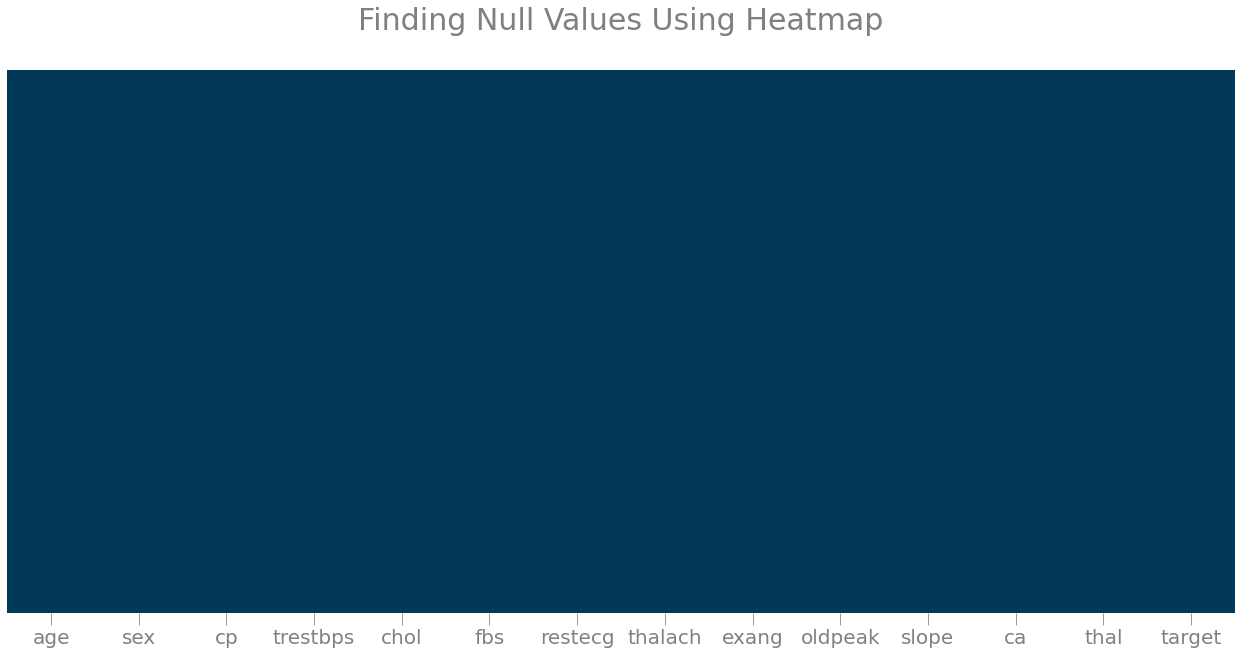

In [5]:
#visualizing Null values if it exists 
plt.figure(figsize=(22,10))
plt.xticks(size=20,color='grey')
plt.tick_params(size=12,color='grey')
plt.title('Finding Null Values Using Heatmap\n',color='grey',size=30)
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuBu_r',
            )

In [6]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = df.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column 

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271


C:\Users\akraj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.05881421 0.05341319 0.13948969 0.07162296 0.07081319 0.02492893
 0.03531793 0.07363128 0.09528921 0.09693104 0.09185177 0.08792312
 0.09997347]


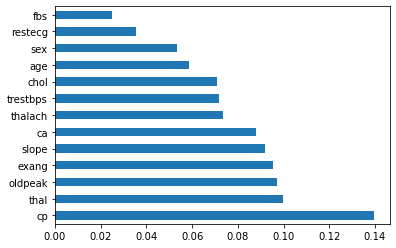

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_)

#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')

plt.show()

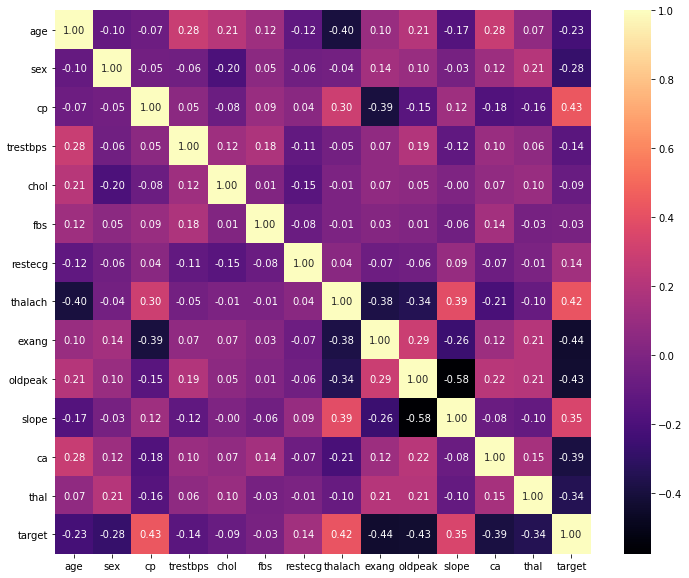

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [10]:
for i in df.columns:
    print(i,len(df[i].unique()))

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


In [11]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [12]:
df2 = df.copy()
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df2['sex'].apply(chng)
def chng2(prob):
    if prob == 0:
        return "Heart Disease"
    else:
        return "No Heart Disease"
df2['target'] = df2['target'].apply(chng2)

In [13]:
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,No Heart Disease
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,No Heart Disease
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,No Heart Disease
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,No Heart Disease
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,No Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,0,1,123,1,0.2,1,0,3,Heart Disease
299,45,male,3,110,264,0,1,132,0,1.2,1,0,3,Heart Disease
300,68,male,0,144,193,1,1,141,0,3.4,1,2,3,Heart Disease
301,57,male,0,130,131,0,1,115,1,1.2,1,1,3,Heart Disease


Text(0.5, 1.0, 'Gender v/s target\n')

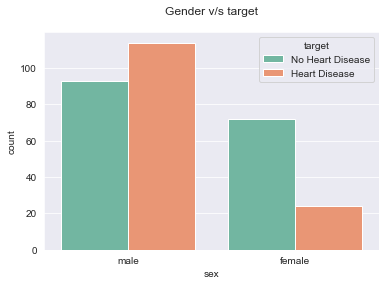

In [14]:
# df2['target'] = df2['target'].apply(chng2)
sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s target\n')

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

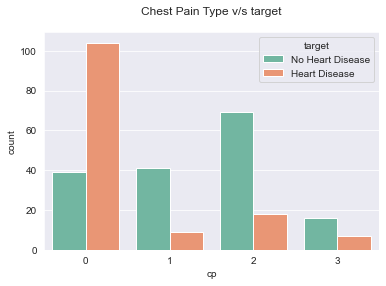

In [15]:
sns.countplot(data= df2, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen


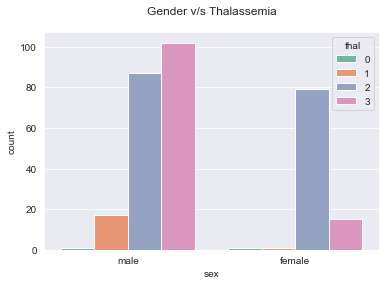

In [16]:
sns.countplot(data= df2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')
print('Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen')

Text(0.5, 1.0, 'Slope v/s Target\n')

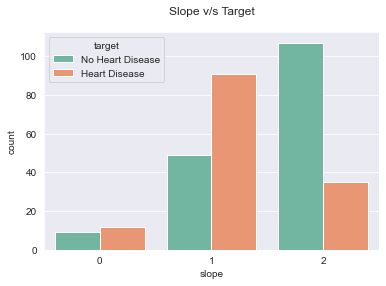

In [17]:
sns.countplot(data= df2, x='slope',hue='target')
plt.title('Slope v/s Target\n')

Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

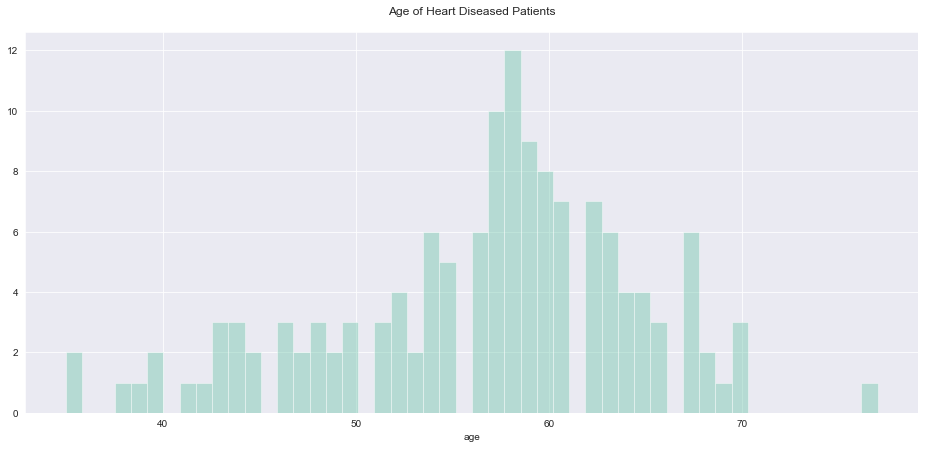

In [18]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

In [19]:
df[df['target']==0]["age"]

165    67
166    67
167    62
168    63
169    53
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 138, dtype: int64

Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

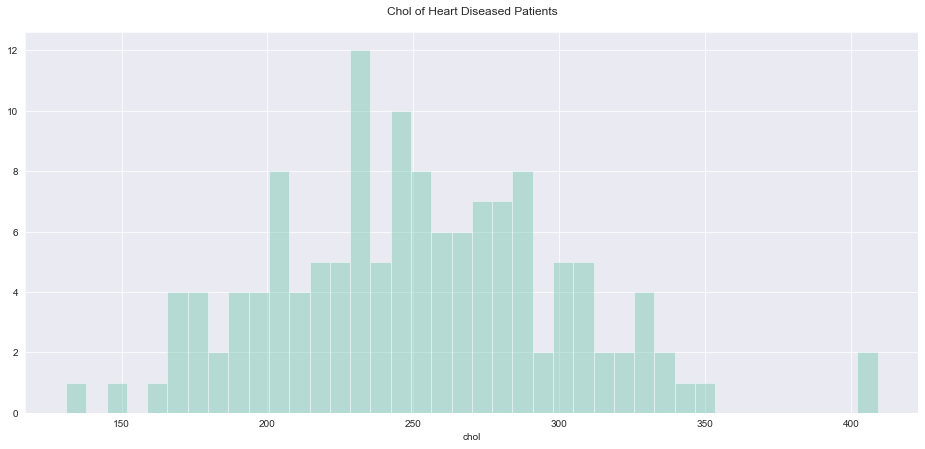

In [20]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

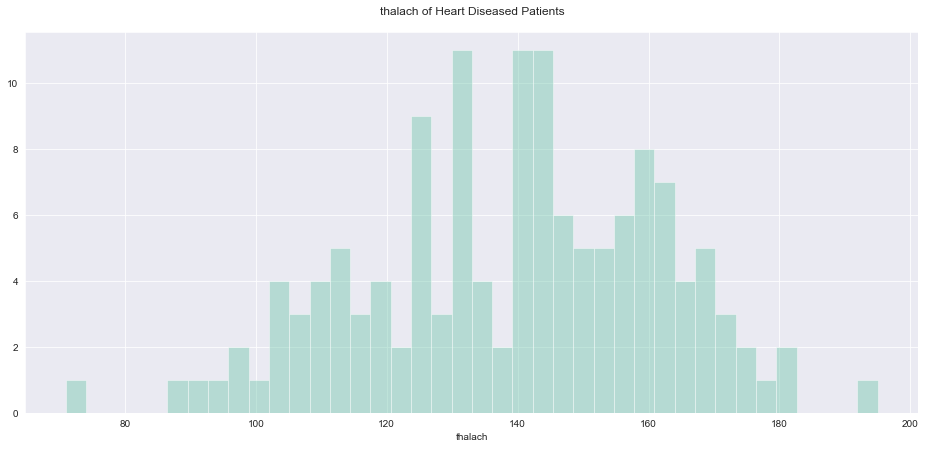

In [21]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

Age vs trestbps(Heart Diseased Patinets)


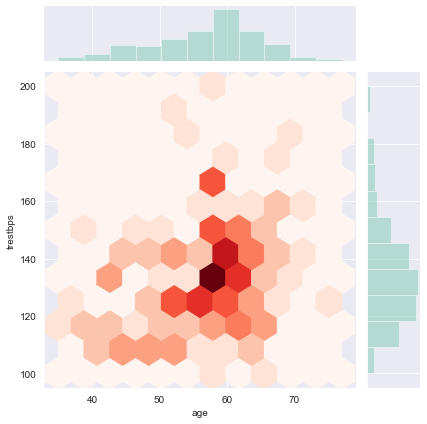

In [22]:
df3 = df[df['target'] == 0 ][['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']] 
#target 0 - people with heart disease
pal = sns.light_palette("blue", as_cmap=True)
print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df3,
              x='age',
              y='trestbps',
              kind='hex',
              cmap='Reds'
           
              )

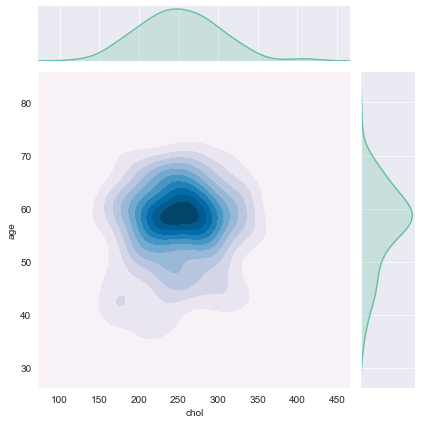

In [23]:
sns.jointplot(data=df3,
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )

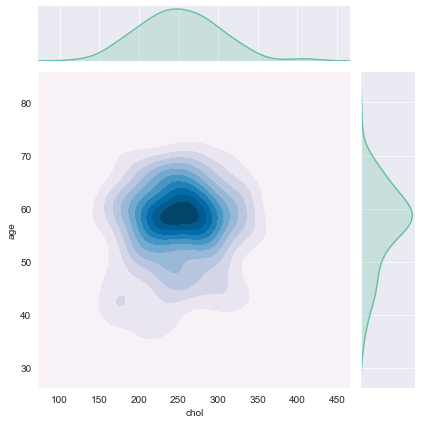

In [24]:
sns.jointplot(data=df3,
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )

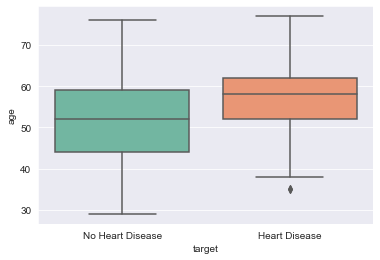

In [25]:
sns.boxplot(data=df2,x='target',y='age')

In [26]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X = df.iloc[:,0:13] # Features
y = df.iloc[:,13] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7252747252747253


In [29]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7362637362637363


In [30]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

In [31]:
#cp - chest_pain_type
df.loc[df['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
df.loc[df['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
df.loc[df['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
df.loc[df['chest_pain_type'] == 3, 'chest_pain_type'] = 'typical angina'

#restecg - rest_ecg_type
df.loc[df['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
df.loc[df['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'normal'
df.loc[df['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'

#slope - st_slope_type
df.loc[df['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
df.loc[df['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
df.loc[df['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

#thal - thalassemia_type
df.loc[df['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
df.loc[df['thalassemia_type'] == 1, 'thalassemia_type'] = 'fixed defect'
df.loc[df['thalassemia_type'] == 2, 'thalassemia_type'] = 'normal'
df.loc[df['thalassemia_type'] == 3, 'thalassemia_type'] = 'reversable defect'

In [74]:
df['rest_ecg_type'].value_counts()

normal                          152
left ventricular hypertrophy    147
ST-T wave abnormality             4
Name: rest_ecg_type, dtype: int64

In [ ]:
df['rest_ecg_type'].value_counts()

In [33]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63,1,typical angina,145,233,1,left ventricular hypertrophy,150,0,2.3,downsloping,0,fixed defect,1
1,37,1,non-anginal pain,130,250,0,normal,187,0,3.5,downsloping,0,normal,1
2,41,0,atypical angina,130,204,0,left ventricular hypertrophy,172,0,1.4,upsloping,0,normal,1
3,56,1,atypical angina,120,236,0,normal,178,0,0.8,upsloping,0,normal,1
4,57,0,asymptomatic,120,354,0,normal,163,1,0.6,upsloping,0,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,asymptomatic,140,241,0,normal,123,1,0.2,flat,0,reversable defect,0
299,45,1,typical angina,110,264,0,normal,132,0,1.2,flat,0,reversable defect,0
300,68,1,asymptomatic,144,193,1,normal,141,0,3.4,flat,2,reversable defect,0
301,57,1,asymptomatic,130,131,0,normal,115,1,1.2,flat,1,reversable defect,0


In [34]:
data = pd.get_dummies(df, drop_first=False)
data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'rest_ecg_type_ST-T wave abnormality',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thalassemia_type_fixed defect',
       'thalassemia_type_normal', 'thalassemia_type_nothing',
       'thalassemia_type_reversable defect'],
      dtype='object')

In [35]:
data

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,...,rest_ecg_type_ST-T wave abnormality,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed defect,thalassemia_type_normal,thalassemia_type_nothing,thalassemia_type_reversable defect
0,63,1,145,233,1,150,0,2.3,0,1,...,0,1,0,1,0,0,1,0,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,0,1,1,0,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,1,0,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,1,0,1,0,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,0,0,1,0,1,0,0,0,0,1
299,45,1,110,264,0,132,0,1.2,0,0,...,0,0,1,0,1,0,0,0,0,1
300,68,1,144,193,1,141,0,3.4,2,0,...,0,0,1,0,1,0,0,0,0,1
301,57,1,130,131,0,115,1,1.2,1,0,...,0,0,1,0,1,0,0,0,0,1


In [36]:
result = data.copy()

In [70]:
X.isna().sum()

age                                           0
sex                                           0
resting_blood_pressure                        0
cholesterol                                   0
fasting_blood_sugar                           0
max_heart_rate_achieved                       0
exercise_induced_angina                       0
st_depression                                 0
num_major_vessels                             0
chest_pain_type_asymptomatic                  0
chest_pain_type_atypical angina               0
chest_pain_type_non-anginal pain              0
chest_pain_type_typical angina                0
rest_ecg_type_ST-T wave abnormality           0
rest_ecg_type_left ventricular hypertrophy    0
rest_ecg_type_normal                          0
st_slope_type_downsloping                     0
st_slope_type_flat                            0
st_slope_type_upsloping                       0
thalassemia_type_fixed defect                 0
thalassemia_type_normal                 

In [76]:
X = result.drop('target', axis = 1)
y = result['target']

X=(X-np.min(X))/(np.max(X)-np.min(X)).values


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [78]:
# X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
# X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

In [80]:
X_test

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,chest_pain_type_asymptomatic,...,rest_ecg_type_ST-T wave abnormality,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed defect,thalassemia_type_normal,thalassemia_type_nothing,thalassemia_type_reversable defect
225,0.854167,1.0,0.481132,0.109589,0.0,0.412214,1.0,0.419355,0.00,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
152,0.729167,1.0,0.716981,0.230594,0.0,0.641221,0.0,0.096774,0.00,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
228,0.625000,1.0,0.716981,0.369863,0.0,0.671756,0.0,0.032258,0.00,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
201,0.645833,1.0,0.292453,0.301370,0.0,0.534351,1.0,0.451613,0.25,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
52,0.687500,1.0,0.339623,0.239726,0.0,0.572519,0.0,0.290323,0.75,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.312500,0.0,0.226415,0.264840,0.0,0.595420,0.0,0.048387,0.25,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
302,0.583333,0.0,0.339623,0.251142,0.0,0.786260,0.0,0.000000,0.25,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
26,0.625000,1.0,0.528302,0.196347,1.0,0.656489,0.0,0.258065,0.00,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
108,0.437500,0.0,0.245283,0.269406,0.0,0.694656,0.0,0.177419,0.00,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [82]:
X_train.isna().sum()

age                                           0
sex                                           0
resting_blood_pressure                        0
cholesterol                                   0
fasting_blood_sugar                           0
max_heart_rate_achieved                       0
exercise_induced_angina                       0
st_depression                                 0
num_major_vessels                             0
chest_pain_type_asymptomatic                  0
chest_pain_type_atypical angina               0
chest_pain_type_non-anginal pain              0
chest_pain_type_typical angina                0
rest_ecg_type_ST-T wave abnormality           0
rest_ecg_type_left ventricular hypertrophy    0
rest_ecg_type_normal                          0
st_slope_type_downsloping                     0
st_slope_type_flat                            0
st_slope_type_upsloping                       0
thalassemia_type_fixed defect                 0
thalassemia_type_normal                 

### Knn Classifier

In [99]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")


from matplotlib import rcParams
from matplotlib.cm import rainbow

In [84]:
## Knn classifier 

knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(round(knn_classifier.score(X_test, y_test),2))
    

In [85]:
max(knn_scores) , knn_scores

(0.92,
 [0.84,
  0.77,
  0.92,
  0.84,
  0.89,
  0.87,
  0.85,
  0.87,
  0.84,
  0.85,
  0.84,
  0.85,
  0.84,
  0.85,
  0.84,
  0.87,
  0.87,
  0.87,
  0.87,
  0.87])

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

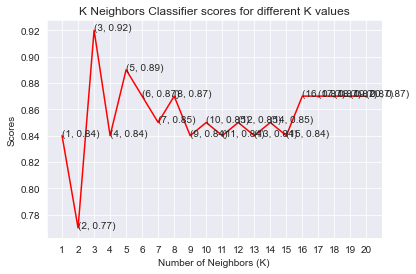

In [91]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [86]:
np.min(X_train)

age                                           0.000000
sex                                           0.000000
resting_blood_pressure                        0.000000
cholesterol                                   0.011416
fasting_blood_sugar                           0.000000
max_heart_rate_achieved                       0.000000
exercise_induced_angina                       0.000000
st_depression                                 0.000000
num_major_vessels                             0.000000
chest_pain_type_asymptomatic                  0.000000
chest_pain_type_atypical angina               0.000000
chest_pain_type_non-anginal pain              0.000000
chest_pain_type_typical angina                0.000000
rest_ecg_type_ST-T wave abnormality           0.000000
rest_ecg_type_left ventricular hypertrophy    0.000000
rest_ecg_type_normal                          0.000000
st_slope_type_downsloping                     0.000000
st_slope_type_flat                            0.000000
st_slope_t

In [87]:
np.max(X_train)

age                                           1.000000
sex                                           1.000000
resting_blood_pressure                        0.924528
cholesterol                                   1.000000
fasting_blood_sugar                           1.000000
max_heart_rate_achieved                       1.000000
exercise_induced_angina                       1.000000
st_depression                                 1.000000
num_major_vessels                             1.000000
chest_pain_type_asymptomatic                  1.000000
chest_pain_type_atypical angina               1.000000
chest_pain_type_non-anginal pain              1.000000
chest_pain_type_typical angina                1.000000
rest_ecg_type_ST-T wave abnormality           1.000000
rest_ecg_type_left ventricular hypertrophy    1.000000
rest_ecg_type_normal                          1.000000
st_slope_type_downsloping                     1.000000
st_slope_type_flat                            1.000000
st_slope_t

In [88]:
#LOgReg
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [89]:
logre.score(X_test,y_test)

0.8688524590163934

In [90]:
# Random Forest 

In [92]:
#SVM
# Support Vector Classifier 


svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(round(svc_classifier.score(X_test, y_test),3)*100)



In [93]:
svc_scores

[86.9, 62.3, 85.2, 85.2]

In [95]:
# Decision Tree Classifier

dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(round(dt_classifier.score(X_test, y_test),2))

In [96]:
dt_scores

[0.74,
 0.79,
 0.72,
 0.84,
 0.77,
 0.79,
 0.79,
 0.74,
 0.75,
 0.75,
 0.79,
 0.69,
 0.79,
 0.77,
 0.75,
 0.75,
 0.82,
 0.79,
 0.75,
 0.74,
 0.75,
 0.77,
 0.8]

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

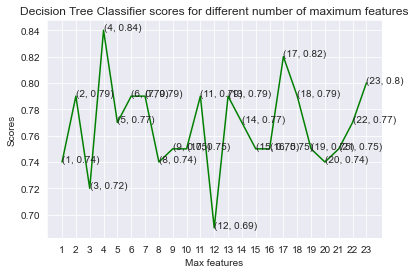

In [97]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [98]:
# Random Forest Classifier 

rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

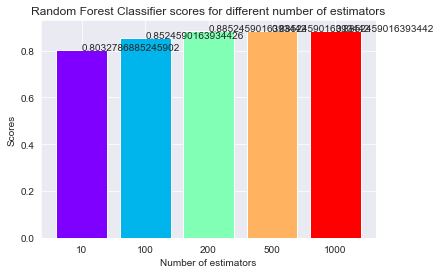

In [100]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [102]:
rf_scores

[0.8032786885245902,
 0.8524590163934426,
 0.8852459016393442,
 0.8852459016393442,
 0.8852459016393442]

In [104]:
model = [knn_classifier , svc_classifier , dt_classifier , rf_classifier]

for i in range(len(model)):
    y_pred = model[i].predict(X_test)
    print(f'{model[i]} \n Accuracy is ' , accuracy_score(y_test , y_pred))
    

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform') 
 Accuracy is  0.8688524590163934
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) 
 Accuracy is  0.8524590163934426
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=23, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best') 
 Accuracy is  0.8032786885245902
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,

In [132]:
data2= data.drop("target",axis=1)
data.iloc[180][["age" ,"sex","resting_blood_pressure","cholesterol","fasting_blood_sugar","max_heart_rate_achieved","target"]]

age                         55.0
sex                          1.0
resting_blood_pressure     132.0
cholesterol                353.0
fasting_blood_sugar          0.0
max_heart_rate_achieved    132.0
target                       0.0
Name: 180, dtype: float64

In [140]:
X.iloc[180]

age                                           0.541667
sex                                           1.000000
resting_blood_pressure                        0.358491
cholesterol                                   0.518265
fasting_blood_sugar                           0.000000
max_heart_rate_achieved                       0.465649
exercise_induced_angina                       1.000000
st_depression                                 0.193548
num_major_vessels                             0.250000
chest_pain_type_asymptomatic                  1.000000
chest_pain_type_atypical angina               0.000000
chest_pain_type_non-anginal pain              0.000000
chest_pain_type_typical angina                0.000000
rest_ecg_type_ST-T wave abnormality           0.000000
rest_ecg_type_left ventricular hypertrophy    0.000000
rest_ecg_type_normal                          1.000000
st_slope_type_downsloping                     0.000000
st_slope_type_flat                            1.000000
st_slope_t

In [142]:
single_test = data2.iloc[180].values

single_test = np.array(single_test)

single_test = single_test.reshape(1,-1)


In [144]:
single_test = single_test.reshape(1,-1)

In [145]:
rf_classifier.predict(single_test)

array([0], dtype=int64)

In [156]:
svc_classifier_save.predict(single_test)

array([0], dtype=int64)

In [157]:
knn_classifier.predict(single_test)

array([1], dtype=int64)

In [158]:
dt_classifier.predict(single_test)

array([0], dtype=int64)

In [159]:
logre.predict(single_test)

array([0], dtype=int64)

In [146]:
y_pred = rf_classifier.predict(X_test)

In [147]:
accuracy_score(y_test,y_pred)

0.8852459016393442

### SAving 

In [153]:
rf_classifier_save = RandomForestClassifier(n_estimators = 200, random_state = 0)

rf_classifier_save.fit(X_train, y_train)

rf_classifier_save.score(X_test,y_test)


import joblib 

file_name = "heart_diesease_RandomForest.sav"
joblib.dump(rf_classifier_save, file_name)

['heart_diesease_RandomForest.sav']

In [154]:
svc_classifier_save = SVC(kernel = "linear")
svc_classifier_save.fit(X_train, y_train)
svc_classifier_save.score(X_test,y_test)

0.8688524590163934

In [155]:
import joblib 

file_name = "heart_diesease_SVM.sav"
joblib.dump(svc_classifier_save, file_name)

['heart_diesease_SVM.sav']

## Prediction

In [160]:
y_pred = logre.predict(X_test)
actual = []
predcition = []
for i,j in zip(y_test,y_pred):
  actual.append(i)
  predcition.append(j)
dic = {'Actual':actual,
       'Prediction':predcition
       }
result  = pd.DataFrame(dic)
import plotly.graph_objects as go
 
fig = go.Figure()
 
 
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,
                    mode='markers',
                    name='Pred'))